   # FINAL YEAR PROJECT

#### Problem Statement - Studying and Applying Machine learning Techniques on Dataset of Malicious and Benign Webpages.

We'll be performing the following on the dataset:    
 Data Exploration  
 Feature Engineering  
 Correlation Metrics  
 Regression Plots    
 Checking for Multicollinearity  
 Feature Selection  
 Feature Scaling or Normalization  
 Data Visualization-Other Plots  
 Selection of Machine Learning Algorithms(Choose at least FIVE)  
 Cross Validation of All models  
 Create all models  
 Evaluation of individual ML model using different metrics  
 Plot Classification Summary/Confusion Matrix/ROC Curve etc.  
 Conclusion

Dataset Link - https://www.kaggle.com/xwolf12/malicious-and-benign-websites

Student Names - Aditya Bansal, Raghav Goel  
Roll numbers - 1810991569, 1810991604  
Submitted to - Mr.Sushil Narang  
Chitkara University  

## Data Exploration


In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset and Printing first 5 rows
df = pd.read_csv('dataset.csv')
print(df.head(5))

       URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0   M0_109          16                          7  iso-8859-1   
1  B0_2314          16                          6       UTF-8   
2   B0_911          16                          6    us-ascii   
3   B0_113          17                          6  ISO-8859-1   
4   B0_403          17                          6       UTF-8   

                  SERVER  CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO  \
0                  nginx           263.0          None           None   
1          Apache/2.4.10         15087.0          None           None   
2  Microsoft-HTTPAPI/2.0           324.0          None           None   
3                  nginx           162.0            US             AK   
4                   None        124140.0            US             TX   

      WHOIS_REGDATE WHOIS_UPDATED_DATE  ...  DIST_REMOTE_TCP_PORT  REMOTE_IPS  \
0  10/10/2015 18:21               None  ...                     0           2   
1       

In [3]:
#finding the total rows and columns in the dataset
df.shape

(1781, 21)

In [4]:
#Tells us about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [5]:
#Tells about the means,counts and quartiles range
df.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [6]:
# Counts of Malicious(1) and Benign(0) webpages
df.Type.value_counts()

0    1565
1     216
Name: Type, dtype: int64

## Feature Engineering

In [7]:
print(df.isnull().sum())
df[pd.isnull(df).any(axis=1)]

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64


,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
5,B0_2064,18,7,UTF-8,nginx,NaN,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,...,6,9,894,11,13,838,894,11,0.0,0
8,M2_17,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,...,0,0,0,2,3,213,146,2,2.0,1
9,M3_75,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,...,0,0,0,2,1,62,146,2,2.0,1
10,B0_1013,20,6,utf-8,Apache,NaN,US,Kansas,14/09/2007 0:00,9/09/2015 0:00,...,0,0,0,0,0,0,0,0,0.0,0
20,B0_161,22,6,utf-8,openresty/1.11.2.1,NaN,US,CA,3/07/1999 0:00,7/08/2015 0:00,...,29,6,3833,43,42,22495,4125,43,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,M4_39,178,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1775,M4_45,194,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,2,124,0,0,0.0,1


In [8]:
df.dropna(inplace=True)
df.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [9]:
df['Type'].value_counts()

0    861
1    106
Name: Type, dtype: int64

In [10]:
filtered_df = df.drop(['URL', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO','WHOIS_REGDATE', 'WHOIS_UPDATED_DATE' ], axis="columns")

filtered_df.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,263.0,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,162.0,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,4586,61,4.0,0


In [11]:
new_df = filtered_df 

## Data Visualization

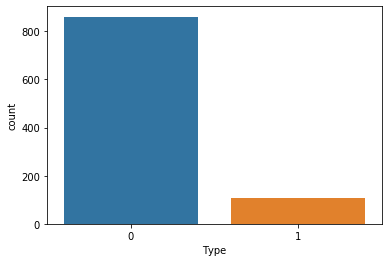

In [12]:
sns.countplot('Type', data=new_df)

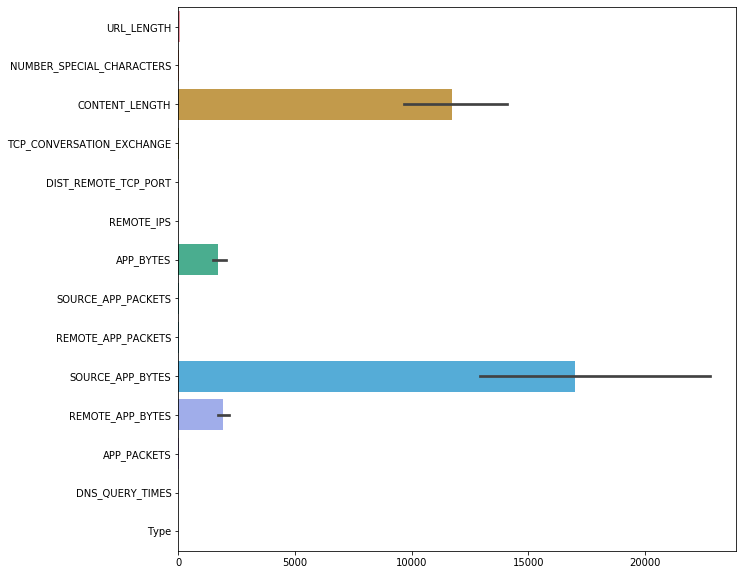

In [13]:
plt.figure(figsize=(10, 10))
sns.barplot(data = new_df, orient='h')

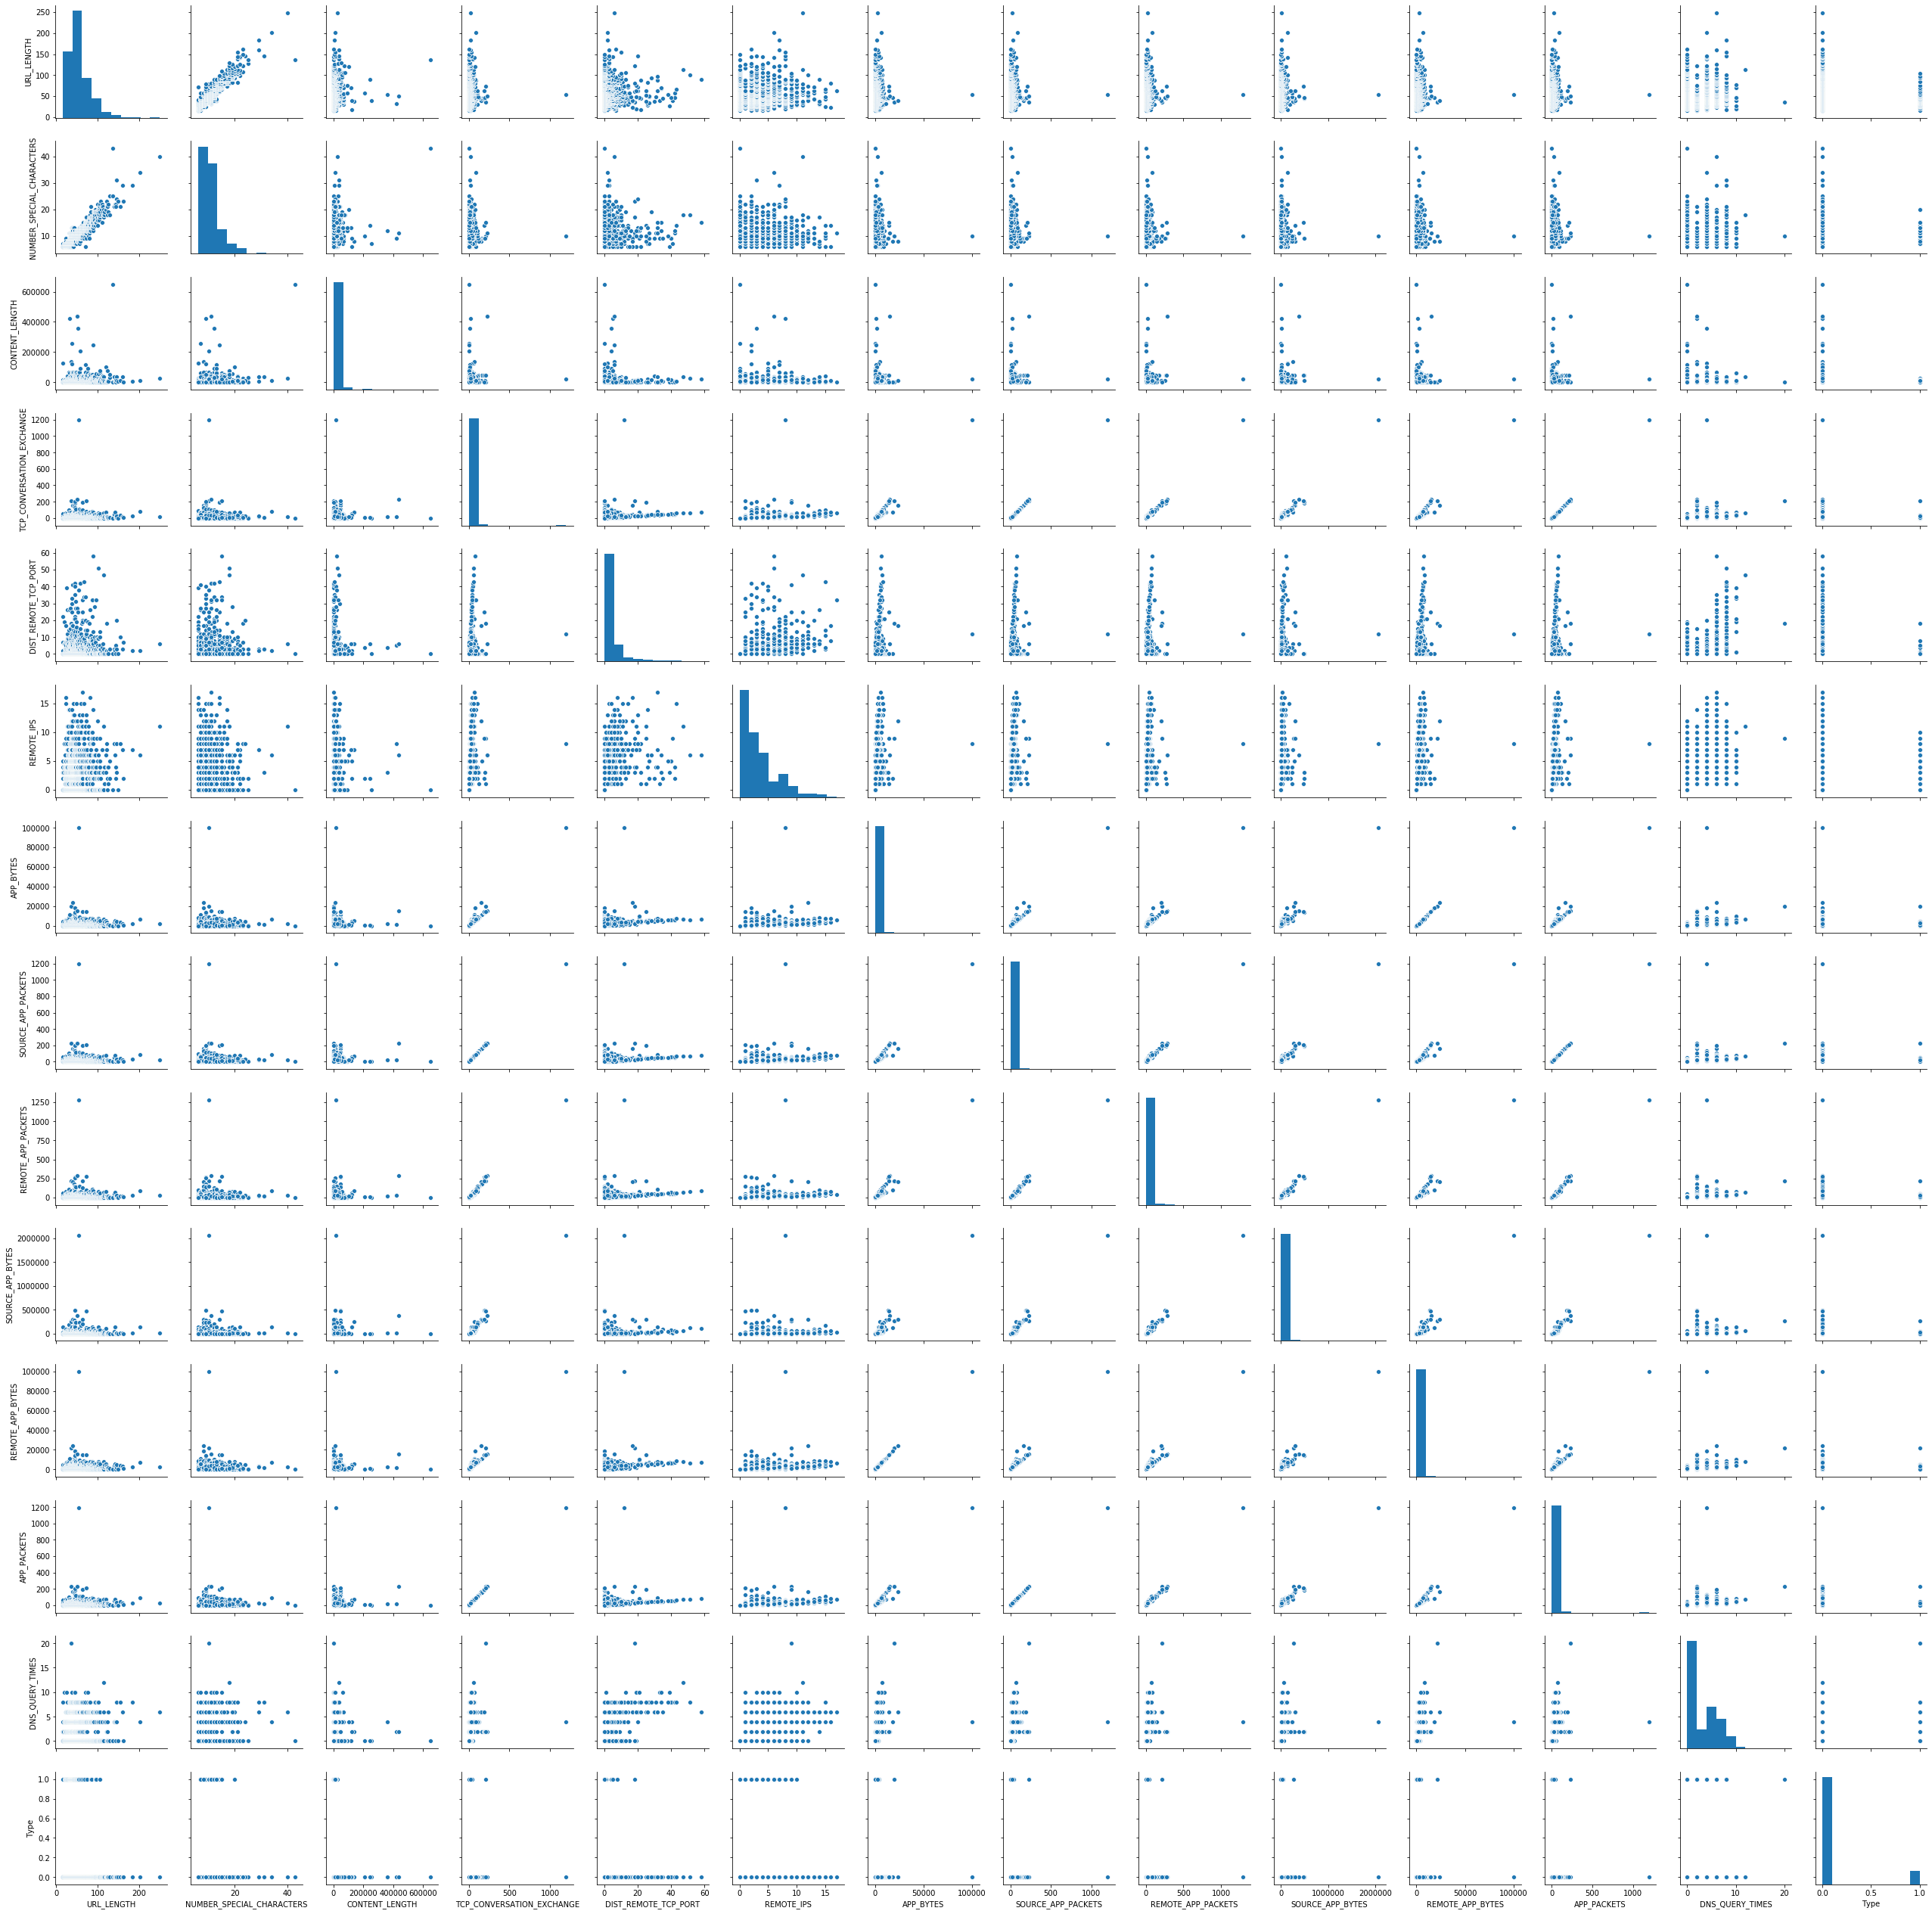

In [14]:
sns.pairplot(data = new_df)

## Correlation Metrics

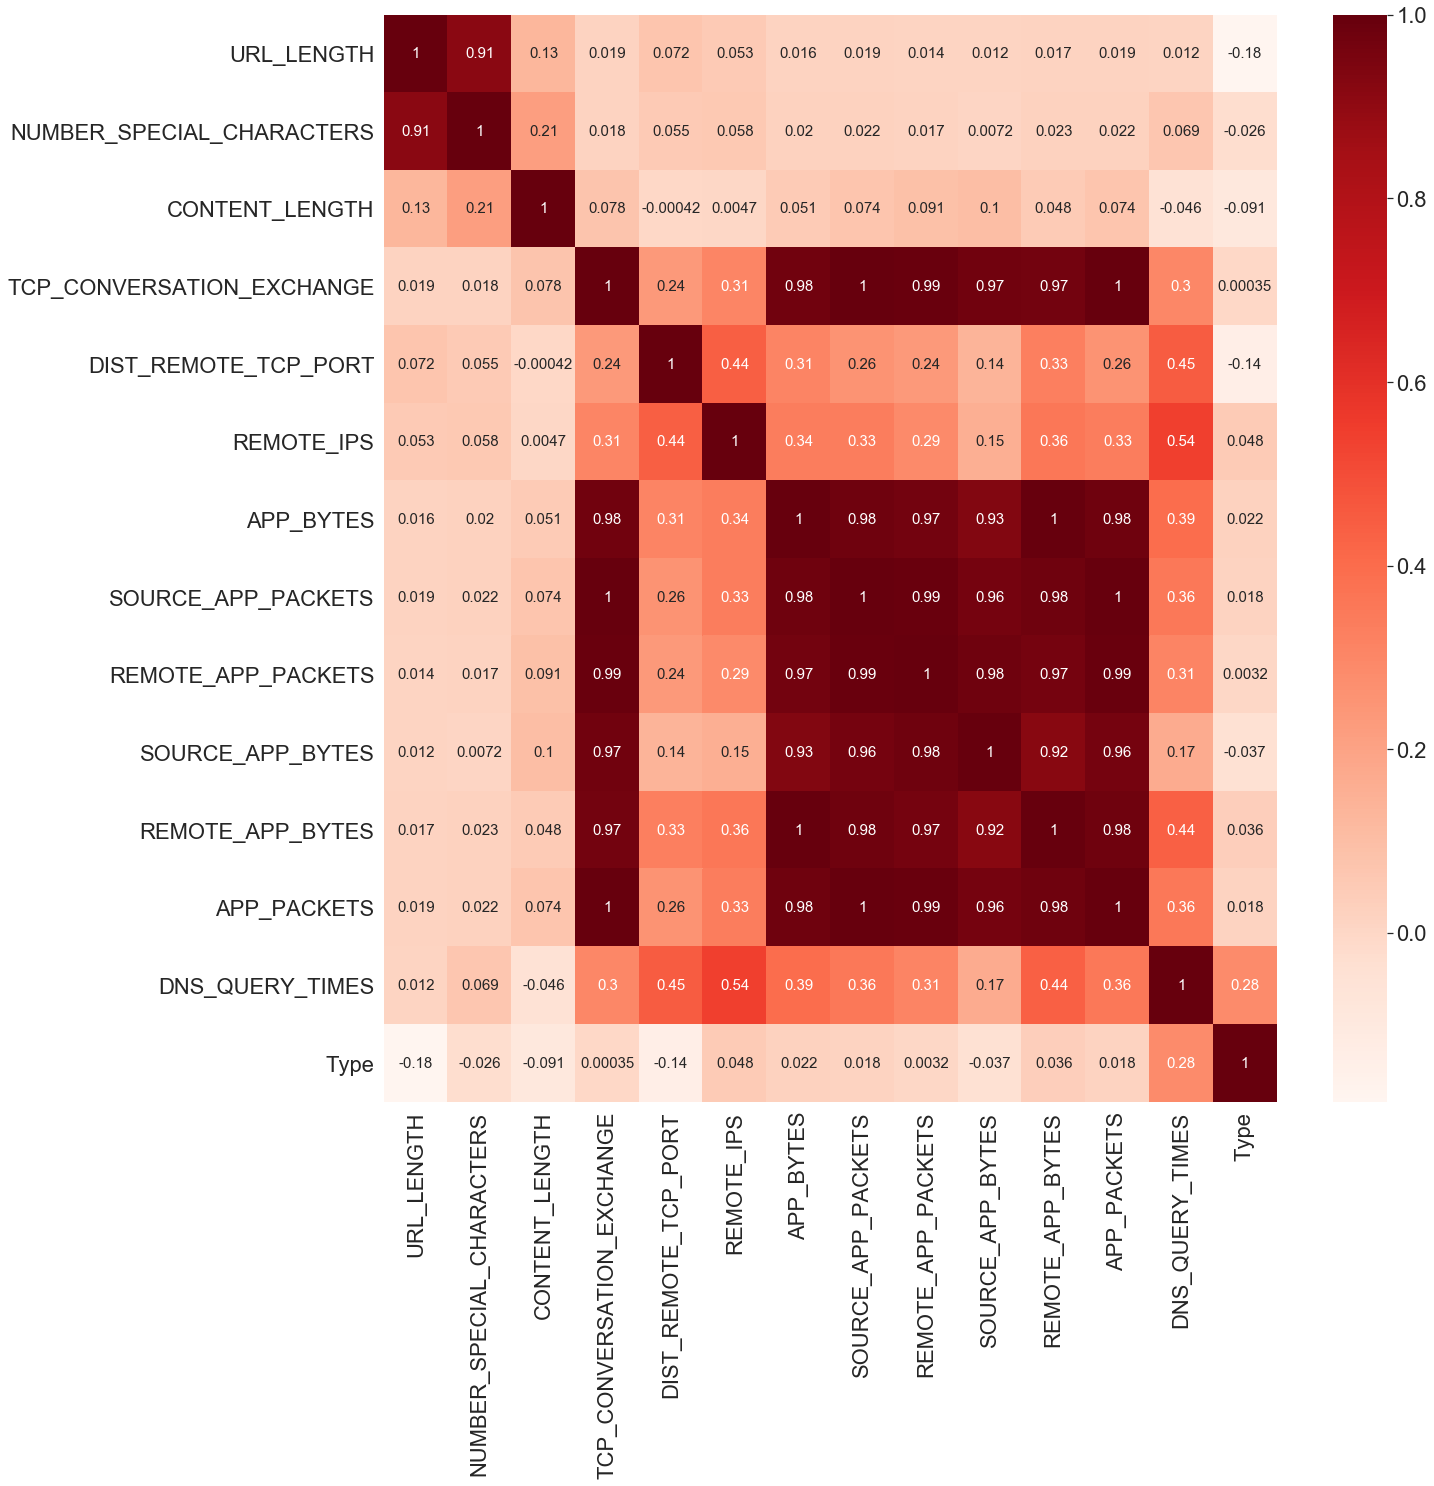

In [15]:
correlation = new_df.corr()
plt.figure(figsize = (20, 20))
sns.set(font_scale = 2)
sns.heatmap(correlation, annot = True, annot_kws = {'size': 15}, cmap = 'Reds')

## Regression Plots

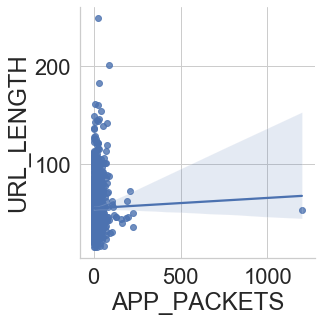

In [16]:
sns.set_style('whitegrid')
sns.lmplot(x ='APP_PACKETS', y ='URL_LENGTH', data = new_df)

## Feature Scaling / Normalisation

In [21]:
X = new_df.drop(['Type'], axis="columns")
X.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,16,7,263.0,7,0,2,700,9,10,1153,832,9,2.0
1,16,6,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0
2,16,6,324.0,0,0,0,0,0,0,0,0,0,0.0
3,17,6,162.0,31,22,3,3812,39,37,18784,4380,39,8.0
4,17,6,124140.0,57,2,5,4278,61,62,129889,4586,61,4.0


In [22]:
y = df['Type']
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Type, dtype: int64

## Machine Learning Models

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f'Training dataset dimensions: {X_train.shape}')
print(f'Test dataset dimensions: {X_test.shape}')
X_train.describe()

Training dataset dimensions: (773, 13)
Test dataset dimensions: (194, 13)


,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
count,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,7.730000e+02,773.000000,773.000000,773.000000
mean,55.564036,10.846054,12097.979301,17.113842,3.437257,3.204398,1697.240621,19.446313,19.424321,1.698494e+04,1877.595084,19.446313,2.326003
std,26.012902,4.246712,37154.048940,49.080984,6.558447,3.401787,4166.681379,49.962875,53.974289,8.532782e+04,4254.539880,49.962875,2.851653
min,16.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,2211.000000,8.000000,1.000000,3.000000,702.000000,9.000000,9.000000,6.400000e+02,786.000000,9.000000,0.000000
75%,66.000000,12.000000,11593.000000,21.000000,4.000000,5.000000,2328.000000,26.000000,24.000000,8.797000e+03,2772.000000,26.000000,4.000000
max,249.000000,43.000000,649263.000000,1194.000000,58.000000,17.000000,99843.000000,1198.000000,1284.000000,2.060012e+06,100151.000000,1198.000000,20.000000


In [24]:
print(y_test.value_counts())

0    172
1     22
Name: Type, dtype: int64


### 1. Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
dtc.score(X_test, y_test)

0.8865979381443299

### 2. Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predicted=classifier.predict(X_test)

In [47]:
rfc.score(X_test, y_test)

0.9381443298969072

In [48]:
from sklearn.metrics import classification_report
print ('Report : ')
print (classification_report(y_test, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.95      0.41      0.57       172
           1       0.15      0.82      0.25        22

    accuracy                           0.45       194
   macro avg       0.55      0.61      0.41       194
weighted avg       0.86      0.45      0.53       194



### 3. Logistic Regression

In [49]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  

In [50]:
from sklearn.linear_model import LogisticRegression  
from sklearn import metrics
from sklearn.feature_selection import RFE
classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train, y_train)  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [52]:
print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.886598


In [33]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
print(cm)

[[165   7]
 [ 15   7]]


Text(0, 0.5, 'Predictions')

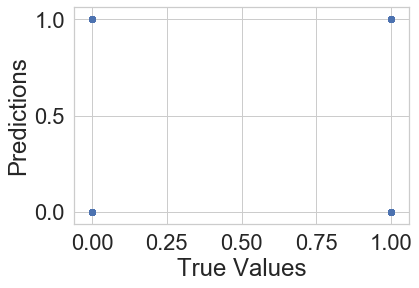

In [34]:
plt.scatter(y_test,y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

### 4. K-Nearest Neighbors Algorithm

In [37]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [38]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [39]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[161  11]
 [ 13   9]]


In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8762886597938144

### 5. Naive Bayes Algorithm

In [42]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)  

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
# Predicting the Test set results  
y_pred = classifier.predict(X_test)  

In [44]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  
print(cm)

[[ 70 102]
 [  4  18]]


In [45]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4536082474226804


# We have successfully performed Exploratory Data Analysis and Applied 5 Different Machine Learning Algorithms on the Dataset.